In [1]:
# Import necessary libraries
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Get the image data into a dataframe
target = []
images = []   # In matrix format
flat_data = []  # In vector format

datadir = '../Data/AppleData'
categories = ['Apple___Apple_scab',
              'Apple___Black_rot',
              'Apple___Cedar_apple_rust',
              'Apple___healthy',
              'Background_without_leaves']

for category in categories:
  path= datadir + '/' + category
  for img in os.listdir(path):
    img_matrix=imread(os.path.join(path,img))
    img_resized=resize(img_matrix,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category)

In [3]:
import pandas as pd
df=pd.DataFrame(flat_data)
df['Target']=target

In [4]:
# Final dataframe after pre-processing
df


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.620925,0.601317,0.690971,0.619820,0.600212,0.689866,0.603029,0.583421,0.673074,0.592236,...,0.480563,0.556364,0.459568,0.449381,0.510516,0.425871,0.534011,0.586077,0.512925,Apple___Apple_scab
1,0.654884,0.541159,0.658806,0.651742,0.538017,0.655664,0.647593,0.533867,0.651514,0.647059,...,0.168475,0.282617,0.061377,0.193551,0.301337,0.086578,0.227818,0.333705,0.126966,Apple___Apple_scab
2,0.588042,0.580198,0.725297,0.583417,0.575574,0.720672,0.569727,0.561884,0.706982,0.565226,...,0.182223,0.292027,0.131242,0.192194,0.301998,0.141214,0.203296,0.313100,0.152316,Apple___Apple_scab
3,0.397645,0.328257,0.445352,0.386719,0.314680,0.449144,0.404865,0.328702,0.481765,0.410827,...,0.360489,0.321273,0.419313,0.384907,0.345691,0.443730,0.431261,0.392045,0.490084,Apple___Apple_scab
4,0.666605,0.654841,0.768566,0.659068,0.647303,0.761028,0.656207,0.644442,0.758168,0.660914,...,0.699485,0.660269,0.758308,0.652724,0.613509,0.711548,0.648176,0.608961,0.707000,Apple___Apple_scab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5783,0.976564,0.984978,0.999990,0.982470,0.994179,0.998504,0.986881,0.999062,0.999890,0.926278,...,0.384422,0.505797,0.113010,0.506074,0.597505,0.238084,0.541718,0.598468,0.263142,Background_without_leaves
5784,0.035711,0.043554,0.028889,0.098460,0.106599,0.085807,0.092128,0.103922,0.068450,0.072344,...,0.087520,0.103207,0.038444,0.092310,0.107997,0.049165,0.095822,0.111508,0.052685,Background_without_leaves
5785,0.084513,0.083992,0.047605,0.064008,0.067860,0.044661,0.119620,0.126512,0.106917,0.179521,...,0.140611,0.305317,0.493553,0.136937,0.301643,0.489878,0.130338,0.295043,0.483279,Background_without_leaves
5786,0.246884,0.446187,0.106714,0.243735,0.470418,0.138066,0.213077,0.455380,0.130560,0.208293,...,0.086862,0.163379,0.019472,0.155148,0.262776,0.115088,0.121469,0.224705,0.142823,Background_without_leaves


In [5]:
# Make category dictionary
cat_dict = {'Apple___Apple_scab':'Scabbed',
              'Apple___Black_rot':'Black Rot',
              'Apple___Cedar_apple_rust':'Cedar Rust',
              'Apple___healthy':'Healthy',
              'Background_without_leaves':'Background'}

/tmp/ipykernel_107409/3329837668.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cat_dict.values())


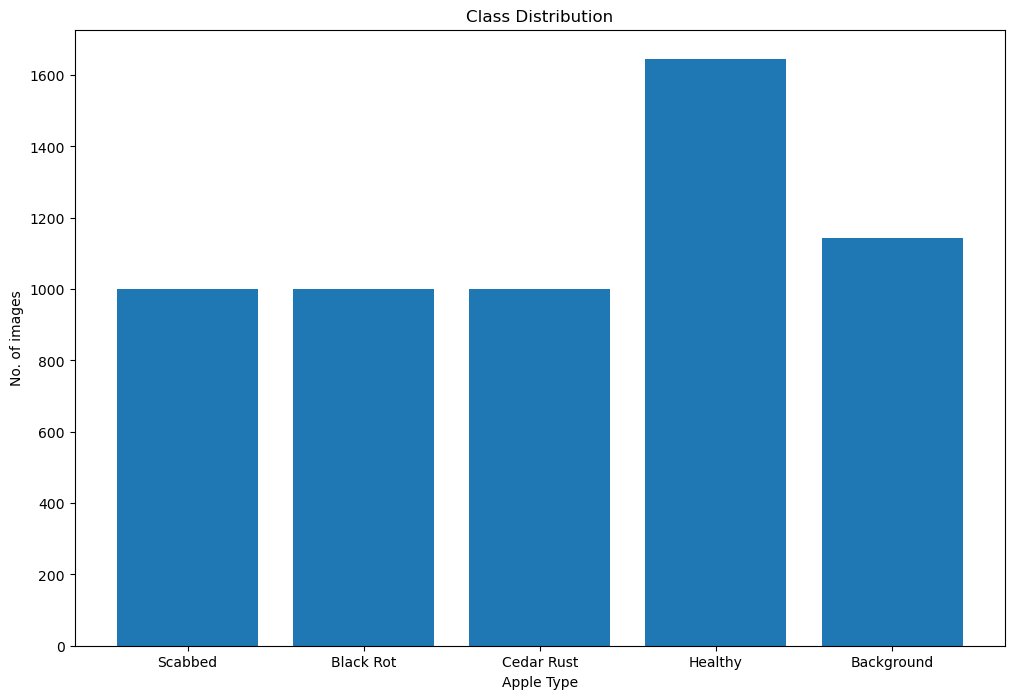

In [6]:
# Display of the number of images of each flower type
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(categories,df['Target'].value_counts(sort=False))
plt.title('Class Distribution')
plt.xlabel('Apple Type')
plt.ylabel('No. of images')
# ax.set_xticks(cat_dict.keys())
ax.set_xticklabels(cat_dict.values())
plt.savefig("../Output/image_distribution.png")
plt.show()

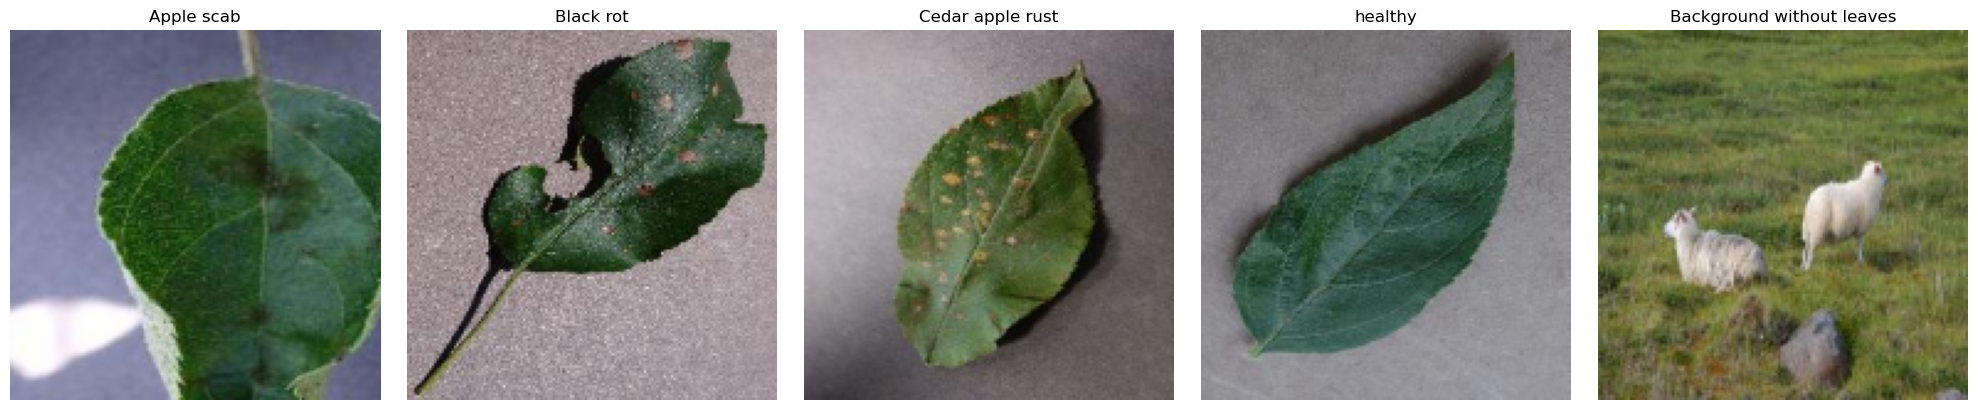

In [7]:
# Display a random image from each category
# Show one random image per category for EDA
n = len(categories)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

for ax, cat in zip(axes, categories):
    folder = os.path.join(datadir, cat)
    files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not files:
        ax.set_title(cat)
        ax.axis('off')
        continue
    chosen = np.random.choice(files)
    img = imread(os.path.join(folder, chosen))
    img = resize(img, (150, 150, 3))
    ax.imshow(img)
    ax.set_title(cat.split('___')[-1].replace('_', ' '))
    ax.axis('off')

plt.tight_layout()
plt.savefig("../Output/Category_examples.png")
plt.show()

In [7]:
# Input and Output 
x=df.iloc[:,0:67500].values
y=df.iloc[:,67500].values

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k=np.arange(1,100)
param={'n_neighbors':k}
model=KNeighborsClassifier()
model_grid=GridSearchCV(model,param,verbose=1)
model_grid.fit(x,y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
